## Prepare the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
data1 = pd.read_excel('data/CustomerDemographic.xls')
data2 = pd.read_excel('data/CustomerAddress.xls')
data3 = pd.read_excel('data/Transactions.xls')

In [4]:
data1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [5]:
data2.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [6]:
data3.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [7]:
# Mengubah type data kolom 'customer_id' menjadi object
data1['customer_id'] = data1['customer_id'].astype(str)
data2['customer_id'] = data1['customer_id'].astype(str)
data3['customer_id'] = data1['customer_id'].astype(str)

# Menggabungkan baris yang memiliki customer_id yang sama
merged_df = pd.merge(data1, data2, on='customer_id', how='inner')
df = pd.merge(merged_df, data3, on='customer_id', how='inner')
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,...,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,...,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,...,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,...,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,...,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


## Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3999 non-null   object        
 1   first_name                           3999 non-null   object        
 2   last_name                            3874 non-null   object        
 3   gender                               3999 non-null   object        
 4   past_3_years_bike_related_purchases  3999 non-null   int64         
 5   DOB                                  3912 non-null   object        
 6   job_title                            3493 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       3999 non-null   object        
 9   deceased_indicator                   3999 non-null   object        
 10  default     

In [9]:
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  655
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
transaction_id                           0
product_id                               0
transaction_date                         0
online_order                            59
order_status                             0
brand      

In [10]:
df = df[['gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car','tenure','state','property_valuation',
    'product_id', 'online_order', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost', ]]

In [11]:
df.dropna(inplace=True)
df.isnull().sum()

gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
state                                  0
property_valuation                     0
product_id                             0
online_order                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
dtype: int64

In [12]:
df.shape

(3186, 18)

In [13]:
df.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,product_id,online_order,brand,product_line,product_class,product_size,list_price,standard_cost
0,F,93,1953-10-12 00:00:00,Health,Mass Customer,N,Yes,11.0,New South Wales,10,2,0.0,Solex,Standard,medium,medium,71.49,53.62
1,Male,81,1980-12-16 00:00:00,Financial Services,Mass Customer,N,Yes,16.0,New South Wales,10,3,1.0,Trek Bicycles,Standard,medium,large,2091.47,388.92
2,Male,61,1954-01-20 00:00:00,Property,Mass Customer,N,Yes,15.0,QLD,9,37,0.0,OHM Cycles,Standard,low,medium,1793.43,248.82
3,Male,33,1961-10-03 00:00:00,IT,Mass Customer,N,No,7.0,New South Wales,4,88,0.0,Norco Bicycles,Standard,medium,medium,1198.46,381.10
5,Male,35,1966-09-16 00:00:00,Retail,High Net Worth,N,Yes,13.0,New South Wales,9,25,1.0,Giant Bicycles,Road,medium,medium,1538.99,829.65


In [14]:
df['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal'], dtype=object)

In [15]:
df[df['gender'] == 'U']

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,product_id,online_order,brand,product_line,product_class,product_size,list_price,standard_cost
33,U,59,1843-12-21,IT,Affluent Customer,N,No,20.0,QLD,4,99,1.0,Trek Bicycles,Road,low,small,1720.7,1531.42


In [16]:
gender_mapping = {
    'F': 'Female',
    'Femal': 'Female',
    'U': 'Female',
    'M': 'Male'
}

# Menggunakan metode replace untuk mengganti nilai dalam kolom 'gender'
df['gender'] = df['gender'].replace(gender_mapping)

In [17]:
# Mengubah type data kolom 'DOB' menjadi date time
df['DOB'] = pd.to_datetime(df['DOB'])

# Mengambil tahun dari kolom 'DOB'
df['Year_of_birth'] = df['DOB'].dt.year
df.drop(['DOB'], axis = 1, inplace = True)

In [18]:
current_date = datetime.now()

# Buat kolom baru 'age' dengan menghitung selisih tahun antara tahun lahir dan tahun sekarang
df['age'] = current_date.year - df['Year_of_birth']


In [19]:
df.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,product_id,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,Year_of_birth,age
0,Female,93,Health,Mass Customer,N,Yes,11.0,New South Wales,10,2,0.0,Solex,Standard,medium,medium,71.49,53.62,1953,70
1,Male,81,Financial Services,Mass Customer,N,Yes,16.0,New South Wales,10,3,1.0,Trek Bicycles,Standard,medium,large,2091.47,388.92,1980,43
2,Male,61,Property,Mass Customer,N,Yes,15.0,QLD,9,37,0.0,OHM Cycles,Standard,low,medium,1793.43,248.82,1954,69
3,Male,33,IT,Mass Customer,N,No,7.0,New South Wales,4,88,0.0,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1961,62
5,Male,35,Retail,High Net Worth,N,Yes,13.0,New South Wales,9,25,1.0,Giant Bicycles,Road,medium,medium,1538.99,829.65,1966,57


In [20]:
df.describe()

,past_3_years_bike_related_purchases,tenure,property_valuation,product_id,online_order,list_price,standard_cost,Year_of_birth,age
count,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000
mean,49.110169,10.722222,7.527307,45.790960,0.498745,1108.293117,543.864262,1977.139987,45.860013
std,28.791048,5.684736,2.816643,30.802713,0.500077,581.512479,400.646788,12.819745,12.819745
min,0.000000,1.000000,1.000000,0.000000,0.000000,12.010000,7.210000,1843.000000,21.000000
25%,24.000000,6.000000,6.000000,18.000000,0.000000,575.270000,211.370000,1968.000000,36.000000
50%,48.000000,11.000000,8.000000,45.000000,0.000000,1163.890000,459.710000,1977.000000,46.000000
75%,73.000000,16.000000,10.000000,73.000000,1.000000,1577.530000,778.690000,1987.000000,55.000000
max,99.000000,22.000000,12.000000,100.000000,1.000000,2091.470000,1759.850000,2002.000000,180.000000


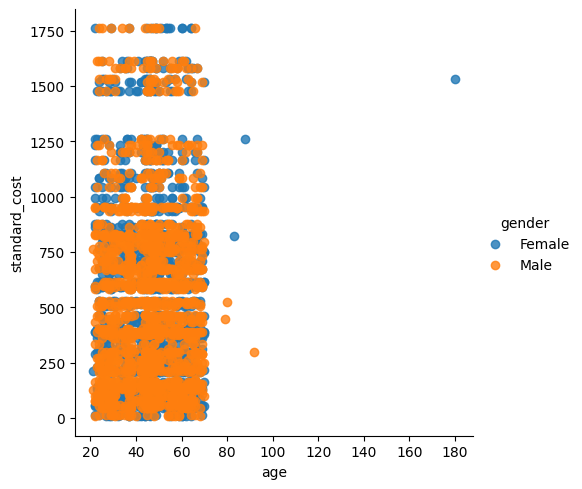

In [21]:
sns.lmplot(x='age', y='standard_cost', data=df, hue='gender', fit_reg=False)

In [22]:
df[df['age'] >= 180]

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,product_id,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,Year_of_birth,age
33,Female,59,IT,Affluent Customer,N,No,20.0,QLD,4,99,1.0,Trek Bicycles,Road,low,small,1720.7,1531.42,1843,180


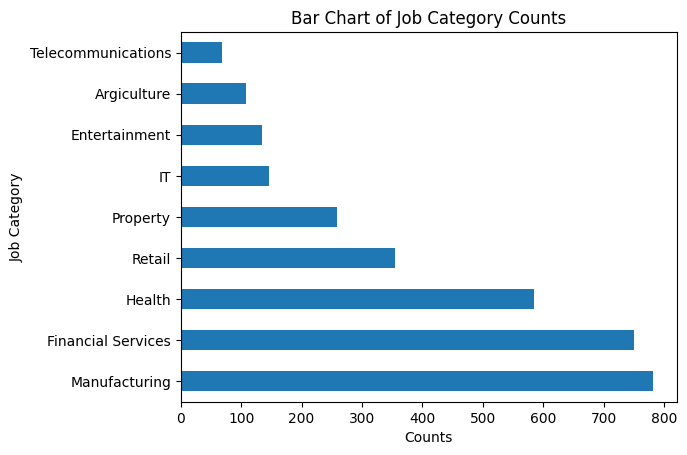

In [23]:
job_category_counts = df['job_industry_category'].value_counts()
job_category_counts.plot(kind='barh')
plt.xlabel('Counts')
plt.ylabel('Job Category')
plt.title('Bar Chart of Job Category Counts')
plt.xticks(rotation=0)
plt.show()

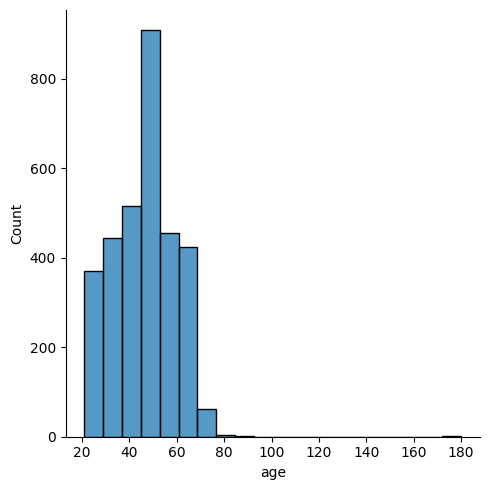

In [24]:
sns.displot(df, x="age", bins=20)

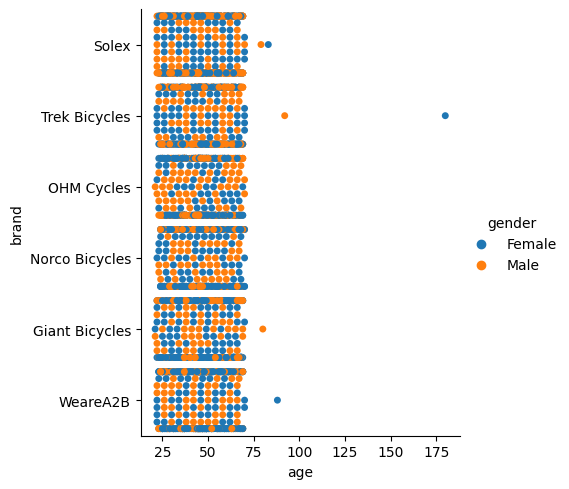

In [25]:
sns.catplot(data=df, x="age", y="brand", hue="gender", kind="swarm")

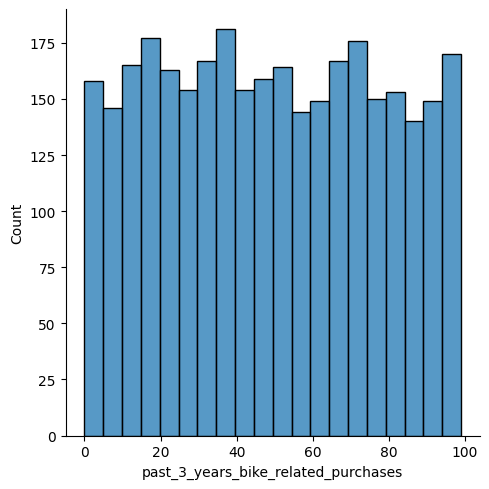

In [26]:
sns.displot(df, x="past_3_years_bike_related_purchases", bins=20)

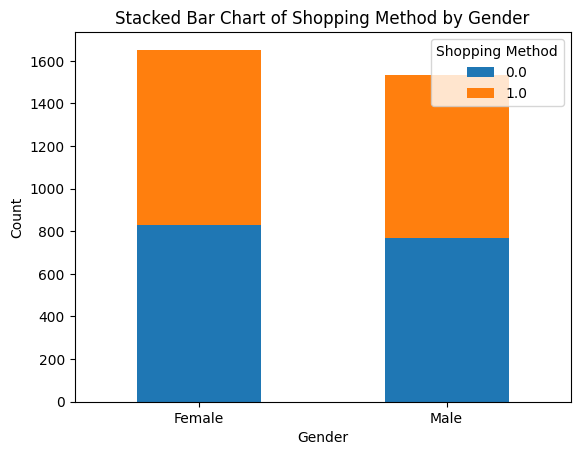

In [27]:
counts = df.groupby(['gender', 'online_order']).size().unstack()

# Membuat stacked bar chart
counts.plot(kind='bar', stacked=True)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Shopping Method by Gender')
plt.legend(title='Shopping Method', loc='upper right')
plt.xticks(rotation=0)
plt.show()

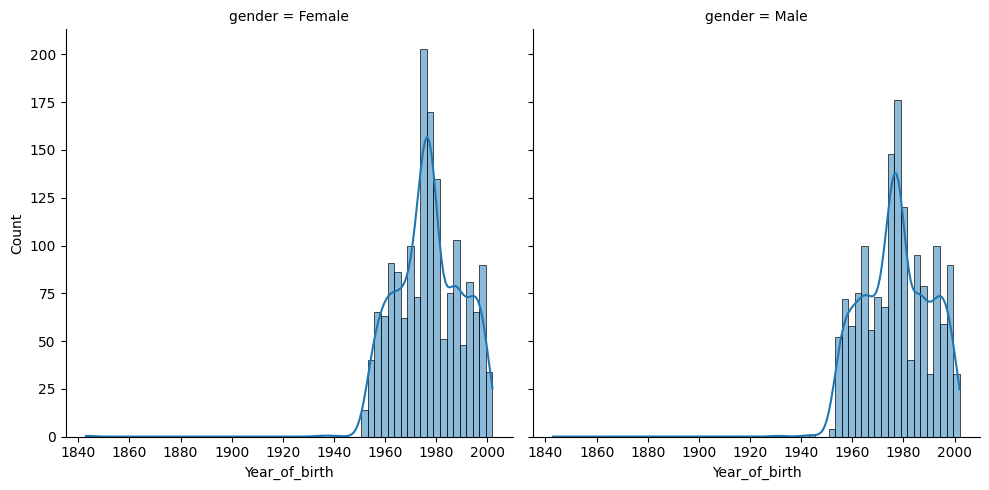

In [28]:
sns.displot(data=df, x="Year_of_birth", col="gender", kde=True)

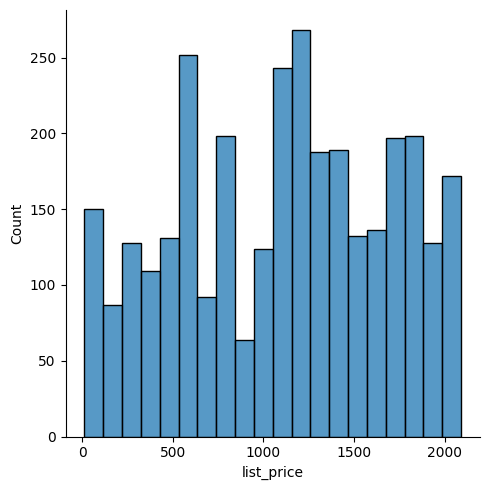

In [29]:
sns.displot(df, x="list_price", bins=20)

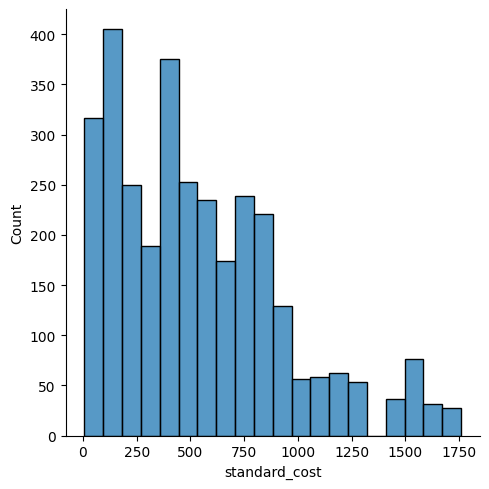

In [30]:
sns.displot(df, x="standard_cost", bins=20)

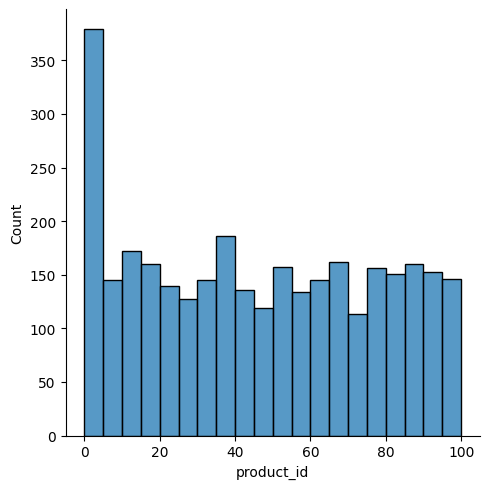

In [31]:
sns.displot(df, x="product_id", bins=20)

In [32]:
df[df['product_id'] == 0]

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,product_id,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,Year_of_birth,age
34,Female,40,Health,High Net Worth,N,Yes,16.0,New South Wales,10,0,0.0,Norco Bicycles,Road,medium,medium,544.05,376.84,1963,60
39,Female,91,Manufacturing,Affluent Customer,N,No,14.0,QLD,2,0,1.0,Norco Bicycles,Road,medium,medium,544.05,376.84,1981,42
54,Male,48,Financial Services,Affluent Customer,N,Yes,7.0,New South Wales,9,0,0.0,Norco Bicycles,Standard,low,medium,363.01,290.41,1956,67
60,Female,47,Property,High Net Worth,N,No,13.0,New South Wales,10,0,0.0,OHM Cycles,Road,high,large,12.01,7.21,1959,64
63,Male,73,IT,High Net Worth,N,No,4.0,VIC,7,0,0.0,Trek Bicycles,Standard,medium,medium,499.53,388.72,1978,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,Male,5,Manufacturing,High Net Worth,N,No,3.0,QLD,4,0,0.0,Trek Bicycles,Standard,high,medium,495.72,297.43,1994,29
3908,Male,1,Manufacturing,High Net Worth,N,Yes,18.0,NSW,10,0,0.0,Norco Bicycles,Standard,low,medium,363.01,290.41,1987,36
3926,Male,29,Manufacturing,Mass Customer,N,Yes,7.0,NSW,9,0,1.0,WeareA2B,Standard,medium,small,175.89,131.92,1978,45
3940,Female,27,Manufacturing,Mass Customer,N,Yes,11.0,QLD,7,0,1.0,Norco Bicycles,Standard,medium,medium,360.40,270.30,1978,45


In [33]:
df = df[df['product_id'] != 0]
df.shape

(3002, 19)

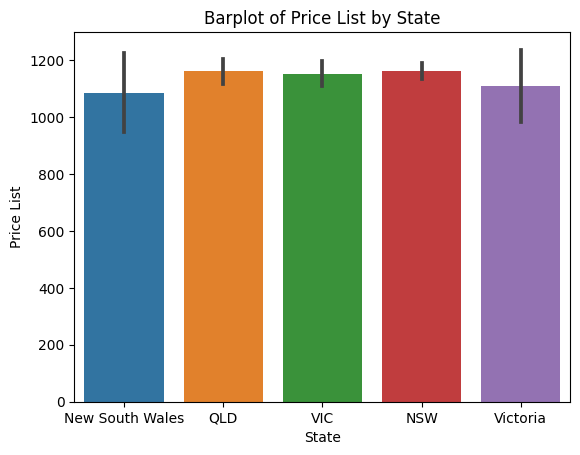

In [34]:
sns.barplot(x='state', y='list_price', data=df)

plt.xlabel('State')
plt.ylabel('Price List')
plt.title('Barplot of Price List by State')
plt.show()

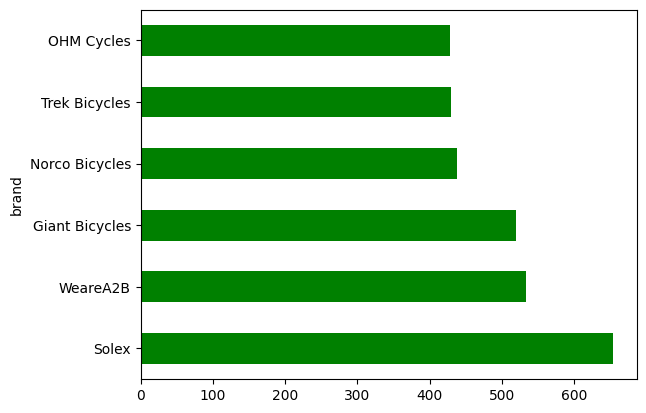

In [35]:
brands_counts = df['brand'].value_counts()
brands_counts.plot(kind='barh',color='g')
plt.show()

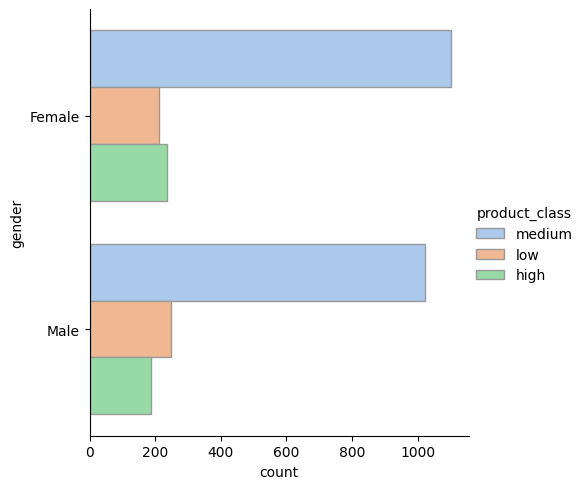

In [36]:
sns.catplot(
    data=df, y="gender", hue="product_class", kind="count",
    palette="pastel", edgecolor=".6",
)

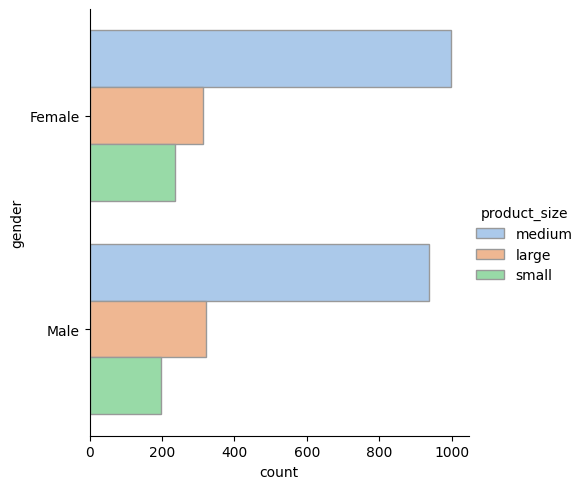

In [37]:
sns.catplot(
    data=df, y="gender", hue="product_size", kind="count",
    palette="pastel", edgecolor=".6",
)

#### Encoding and One-hot-encoding

In [38]:
df_new = df.copy()
df_new.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,product_id,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,Year_of_birth,age
0,Female,93,Health,Mass Customer,N,Yes,11.0,New South Wales,10,2,0.0,Solex,Standard,medium,medium,71.49,53.62,1953,70
1,Male,81,Financial Services,Mass Customer,N,Yes,16.0,New South Wales,10,3,1.0,Trek Bicycles,Standard,medium,large,2091.47,388.92,1980,43
2,Male,61,Property,Mass Customer,N,Yes,15.0,QLD,9,37,0.0,OHM Cycles,Standard,low,medium,1793.43,248.82,1954,69
3,Male,33,IT,Mass Customer,N,No,7.0,New South Wales,4,88,0.0,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1961,62
5,Male,35,Retail,High Net Worth,N,Yes,13.0,New South Wales,9,25,1.0,Giant Bicycles,Road,medium,medium,1538.99,829.65,1966,57


In [39]:
gender_mapping = {
    'Female': 0,
    'Male': 1,
}

# Menggunakan metode replace untuk mengganti nilai dalam kolom 'gender'
df_new['gender'] = df_new['gender'].replace(gender_mapping)
df_new['gender'].astype('int64')

0       0
1       1
2       1
3       1
5       1
       ..
3993    0
3994    1
3995    0
3996    0
3998    1
Name: gender, Length: 3002, dtype: int64

In [40]:
df_new['job_industry_category'].unique()

array(['Health', 'Financial Services', 'Property', 'IT', 'Retail',
       'Argiculture', 'Manufacturing', 'Telecommunications',
       'Entertainment'], dtype=object)

In [41]:
df_new['job_industry_category'] = pd.factorize(df_new['job_industry_category'])[0]
df_new['wealth_segment'] = pd.factorize(df_new['wealth_segment'])[0]
df_new['state'] = pd.factorize(df_new['state'])[0]
df_new['brand'] = pd.factorize(df_new['brand'])[0]
df_new['product_line'] = pd.factorize(df_new['product_line'])[0]

In [42]:
deceased_mapping = {
    'N': 0,
    'Y': 1,
}

df_new['deceased_indicator'] = df_new['deceased_indicator'].replace(deceased_mapping)

In [43]:
df_new['owns_car'].unique()

array(['Yes', 'No'], dtype=object)

In [44]:
owncar_mapping = {
    'No': 0,
    'Yes': 1,
}

# Menggunakan metode replace untuk mengencode nilai dalam kolom 'job_industry_category'
df_new['owns_car'] = df_new['owns_car'].replace(owncar_mapping)

In [45]:
df_new.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,product_id,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,Year_of_birth,age
0,0,93,0,0,0,1,11.0,0,10,2,0.0,0,0,medium,medium,71.49,53.62,1953,70
1,1,81,1,0,0,1,16.0,0,10,3,1.0,1,0,medium,large,2091.47,388.92,1980,43
2,1,61,2,0,0,1,15.0,1,9,37,0.0,2,0,low,medium,1793.43,248.82,1954,69
3,1,33,3,0,0,0,7.0,0,4,88,0.0,3,0,medium,medium,1198.46,381.10,1961,62
5,1,35,4,1,0,1,13.0,0,9,25,1.0,4,1,medium,medium,1538.99,829.65,1966,57


In [46]:
# One-hot encoding pada kolom 'product_class' dan 'product_size' dengan mengubah nilainya menjadi 1 dan 0
df_new = pd.get_dummies(df_new, columns=['product_class', 'product_size'], prefix=['class', 'size'], drop_first=False)
df_new.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,product_id,...,list_price,standard_cost,Year_of_birth,age,class_high,class_low,class_medium,size_large,size_medium,size_small
0,0,93,0,0,0,1,11.0,0,10,2,...,71.49,53.62,1953,70,False,False,True,False,True,False
1,1,81,1,0,0,1,16.0,0,10,3,...,2091.47,388.92,1980,43,False,False,True,True,False,False
2,1,61,2,0,0,1,15.0,1,9,37,...,1793.43,248.82,1954,69,False,True,False,False,True,False
3,1,33,3,0,0,0,7.0,0,4,88,...,1198.46,381.10,1961,62,False,False,True,False,True,False
5,1,35,4,1,0,1,13.0,0,9,25,...,1538.99,829.65,1966,57,False,False,True,False,True,False


In [47]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3002 entries, 0 to 3998
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               3002 non-null   int64  
 1   past_3_years_bike_related_purchases  3002 non-null   int64  
 2   job_industry_category                3002 non-null   int64  
 3   wealth_segment                       3002 non-null   int64  
 4   deceased_indicator                   3002 non-null   int64  
 5   owns_car                             3002 non-null   int64  
 6   tenure                               3002 non-null   float64
 7   state                                3002 non-null   int64  
 8   property_valuation                   3002 non-null   int64  
 9   product_id                           3002 non-null   int64  
 10  online_order                         3002 non-null   float64
 11  brand                              

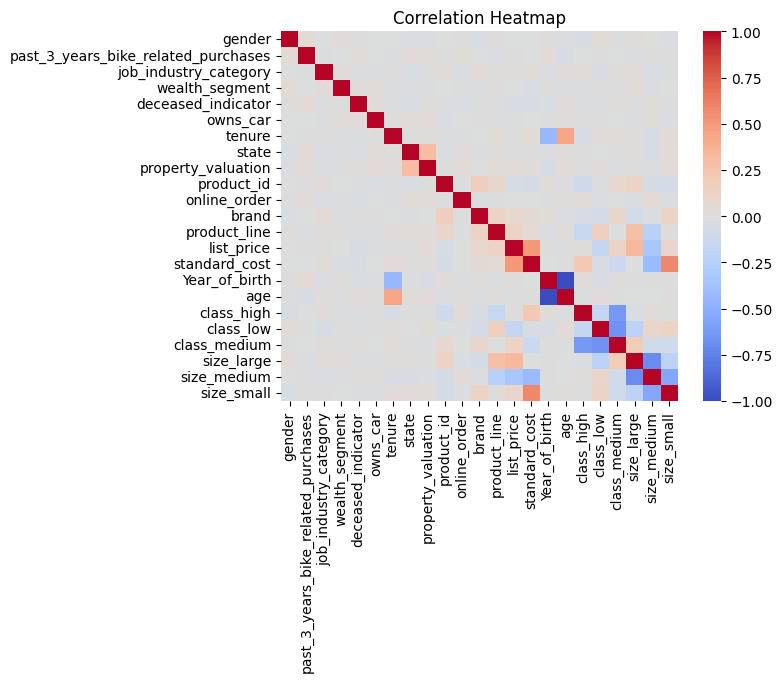

In [48]:
correlation_matrix = df_new.corr()

# Membuat heatmap untuk visualisasi korelasi
sns.heatmap(correlation_matrix, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

### Feature Selection

In [49]:
df_new2 = df_new[['gender', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'state', 'property_valuation', 'product_id',
       'online_order', 'brand', 'product_line', 'list_price', 'standard_cost']]
df_new2.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,product_id,online_order,brand,product_line,list_price,standard_cost
0,0,93,0,0,0,1,11.0,0,10,2,0.0,0,0,71.49,53.62
1,1,81,1,0,0,1,16.0,0,10,3,1.0,1,0,2091.47,388.92
2,1,61,2,0,0,1,15.0,1,9,37,0.0,2,0,1793.43,248.82
3,1,33,3,0,0,0,7.0,0,4,88,0.0,3,0,1198.46,381.10
5,1,35,4,1,0,1,13.0,0,9,25,1.0,4,1,1538.99,829.65


## Modeling

### KMeans

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,  davies_bouldin_score, calinski_harabasz_score

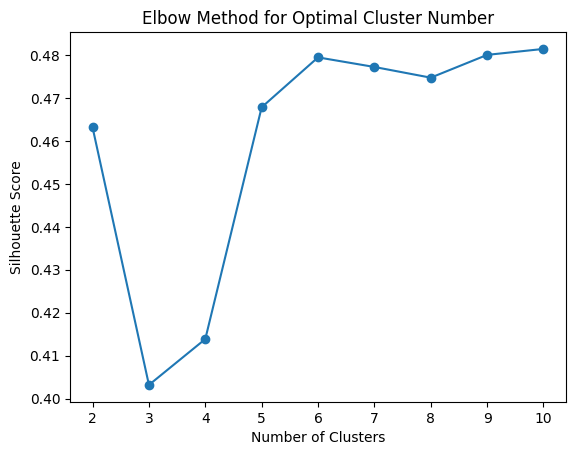

In [51]:
# Determine the optimal number of clusters using the Elbow method
silhouette_scores = []
possible_clusters = range(2, 11) 

for n_clusters in possible_clusters:
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans_model.fit_predict(df_new2)
    silhouette_avg = silhouette_score(df_new2, kmeans_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow curve
plt.plot(possible_clusters, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Elbow Method for Optimal Cluster Number")
plt.show()

In [52]:
# Based on the Elbow curve, choose the optimal number of clusters
optimal_clusters = 6 

# Create K-Means model with the optimal number of clusters
kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans_model.fit_predict(df_new2)

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(df_new2, kmeans_labels)
print(f"Optimal Number of Clusters: {optimal_clusters}")
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(df_new2, kmeans_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_avg}")

# Calculate Calinski-Harabasz Index (Variance Ratio Criterion)
calinski_harabasz_avg = calinski_harabasz_score(df_new2, kmeans_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg}")

Optimal Number of Clusters: 6
Silhouette Score: 0.4794857585548477
Davies-Bouldin Index: 0.6695993349261372
Calinski-Harabasz Index: 4569.099232083461


### PCA

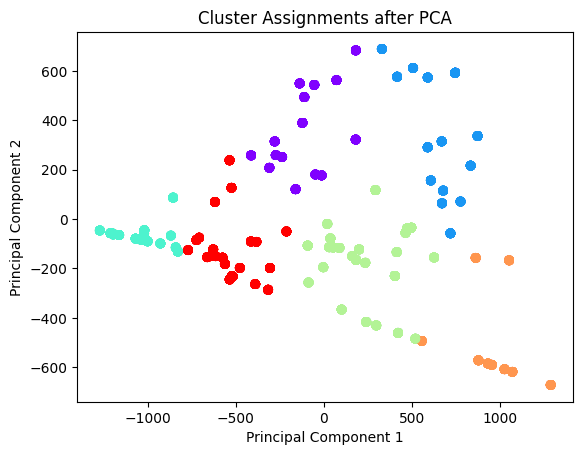

In [53]:
from sklearn.decomposition import PCA

X = df_new2.values

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X)

kmeans_labels = kmeans_model.fit_predict(X_pca)

# Plot the data points colored by cluster assignments after PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title("Cluster Assignments after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


### Hierarchical Clustering

In [54]:
from sklearn.cluster import AgglomerativeClustering

# Create Hierarchical Clustering model
hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical_labels = hierarchical_model.fit_predict(df_new2)

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(df_new2, hierarchical_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4714380368754469


## Save model to a file

In [55]:
import joblib

model_filename = 'customersegmen_model.pkl'
joblib.dump(kmeans_model, model_filename)

print("Model saved to", model_filename)

Model saved to customersegmen_model.pkl
